<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn,optim
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchLearning import *

In [2]:
from torch.optim import lr_scheduler

#**一、优化器与状态字典(state_dict)**

In [3]:
torch.manual_seed(420)

features, labels = tensorGenReg(w=[2,-1,3,1,2],bias=False,deg=2)

train_loader, test_loader = split_loader(features,labels,batch_size=50)

In [4]:
torch.manual_seed(24)

tanh_model1 = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")

In [5]:
optimizer = optim.SGD(tanh_model1.parameters(),lr=0.05)

In [7]:
len(list(tanh_model1.parameters()))

10

In [6]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.05,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]}

In [9]:
optimizer.state_dict()["param_groups"]

[{'lr': 0.05,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False,
  'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [10]:
optimizer.state_dict()["param_groups"][0]

{'lr': 0.05,
 'momentum': 0,
 'dampening': 0,
 'weight_decay': 0,
 'nesterov': False,
 'maximize': False,
 'foreach': None,
 'differentiable': False,
 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [11]:
optimizer.state_dict()["param_groups"][0]["lr"] # 进行下一轮迭代时学习率

0.05

In [16]:
tanh_model1.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.2365, -0.1118, -0.3801,  0.0275,  0.4168],
                      [-0.1995, -0.1456,  0.3497, -0.0622, -0.1708],
                      [-0.0901,  0.0164, -0.3643, -0.1278,  0.4336],
                      [-0.0959,  0.4073, -0.1746, -0.1799, -0.1333]])),
             ('linear1.bias', tensor([-0.3999, -0.2694,  0.2703, -0.3355])),
             ('normalize1.weight', tensor([1., 1., 1., 1.])),
             ('normalize1.bias', tensor([0., 0., 0., 0.])),
             ('normalize1.running_mean', tensor([0., 0., 0., 0.])),
             ('normalize1.running_var', tensor([1., 1., 1., 1.])),
             ('normalize1.num_batches_tracked', tensor(0)),
             ('linear2.weight', tensor([[ 0.1708,  0.4704, -0.0635,  0.2187],
                      [ 0.2336, -0.3569, -0.1928, -0.1566],
                      [ 0.4825, -0.4463,  0.3027,  0.4696],
                      [ 0.3953,  0.2131,  0.2226, -0.0267]])),
             ('linear2.bias', tens

In [18]:
t1 = tanh_model1.state_dict()
torch.save(t1,"tanh1.pt")

In [19]:
criterion = nn.MSELoss()
for X,y in train_loader:
  yhat = tanh_model1.forward(X)
  loss = criterion(yhat,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [20]:
tanh_model1.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.1837, -0.2990, -0.3235,  0.0331,  0.4835],
                      [-0.2971, -0.1304,  0.2700,  0.0287, -0.3070],
                      [ 0.1294,  0.1729, -0.2994, -0.2714,  0.4283],
                      [-0.1686,  0.4945, -0.1437, -0.1727, -0.0758]])),
             ('linear1.bias', tensor([-0.3999, -0.2694,  0.2703, -0.3355])),
             ('normalize1.weight', tensor([1.0653, 0.9840, 1.0446, 1.0984])),
             ('normalize1.bias', tensor([ 0.2773, -0.0783, -0.2868,  0.0459])),
             ('normalize1.running_mean',
              tensor([-0.2842, -0.2179,  0.2145, -0.2602])),
             ('normalize1.running_var',
              tensor([0.5320, 0.4225, 0.5139, 0.4278])),
             ('normalize1.num_batches_tracked', tensor(14)),
             ('linear2.weight', tensor([[ 0.2558,  0.5226, -0.1346,  0.3224],
                      [ 0.1675, -0.0388, -0.4682, -0.3733],
                      [ 0.4295, -0.3640,  0.2876,  0.592

In [21]:
tanh_model1.load_state_dict(torch.load("tanh1.pt"))

<All keys matched successfully>

In [22]:
tanh_model1.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.2365, -0.1118, -0.3801,  0.0275,  0.4168],
                      [-0.1995, -0.1456,  0.3497, -0.0622, -0.1708],
                      [-0.0901,  0.0164, -0.3643, -0.1278,  0.4336],
                      [-0.0959,  0.4073, -0.1746, -0.1799, -0.1333]])),
             ('linear1.bias', tensor([-0.3999, -0.2694,  0.2703, -0.3355])),
             ('normalize1.weight', tensor([1., 1., 1., 1.])),
             ('normalize1.bias', tensor([0., 0., 0., 0.])),
             ('normalize1.running_mean', tensor([0., 0., 0., 0.])),
             ('normalize1.running_var', tensor([1., 1., 1., 1.])),
             ('normalize1.num_batches_tracked', tensor(0)),
             ('linear2.weight', tensor([[ 0.1708,  0.4704, -0.0635,  0.2187],
                      [ 0.2336, -0.3569, -0.1928, -0.1566],
                      [ 0.4825, -0.4463,  0.3027,  0.4696],
                      [ 0.3953,  0.2131,  0.2226, -0.0267]])),
             ('linear2.bias', tens

#**二、LambdaLR基本使用方法**

In [51]:
lr_lambda = lambda epoch: 0.5 ** epoch

In [52]:
torch.manual_seed(24)

tanh_model1 = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")

In [53]:
optimizer = optim.SGD(tanh_model1.parameters(),lr=0.05)

In [54]:
scheduler = lr_scheduler.LambdaLR(optimizer,lr_lambda)

In [55]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.05,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'initial_lr': 0.05,
   'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]}

In [56]:
for X,y in train_loader:
  yhat = tanh_model1.forward(X)
  loss = criterion(yhat,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
scheduler.step() # epoch数值会加1

In [57]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None},
  1: {'momentum_buffer': None},
  2: {'momentum_buffer': None},
  3: {'momentum_buffer': None},
  4: {'momentum_buffer': None},
  5: {'momentum_buffer': None},
  6: {'momentum_buffer': None},
  7: {'momentum_buffer': None},
  8: {'momentum_buffer': None},
  9: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.025,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'initial_lr': 0.05,
   'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]}

&emsp;&emsp;至此，知道了scheduler.step()的真实作用——令匿名函数的自变量+1，然后令匿名函数的输出结果与initial_lr相乘，并把计算结果传给优化器，作为下一次优化器计算时的学习率。

In [69]:
scheduler.state_dict()

{'base_lrs': [0.05],
 'last_epoch': 3,
 'verbose': False,
 '_step_count': 4,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.00625],
 'lr_lambdas': [None]}

#**三、LambdaLR学习率调度实验**

In [81]:
def fit_rec_sc(
    net,
    criterion,
    optimizer,
    train_data,
    test_data,
    scheduler,
    epochs=3,
    cla=False,
    eva=mse_cal,
):
  """加入学习率调度后的模型训练函数（记录每一次遍历后模型评估指标）

  :param net：待训练的模型 
  :param criterion: 损失函数
  :param optimizer：优化算法
  :param train_data：训练数据
  :param test_data: 测试数据 
  :param scheduler: 学习率调度器
  :param epochs: 遍历数据次数
  :param cla: 是否是分类问题
  :param eva: 模型评估方法
  :return：模型评估结果
  """
  train_l = []
  test_l = []
  for epoch  in range(epochs):
      net.train()
      for X, y in train_data:
          if cla == True:
              y = y.flatten().long()          # 如果是分类问题，需要对y进行整数转化
          yhat = net.forward(X)
          loss = criterion(yhat, y)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      scheduler.step()  
      net.eval()
      train_l.append(eva(train_data, net).detach())
      test_l.append(eva(test_data, net).detach())
  return train_l, test_l


In [82]:
lr_lambda = lambda epoch: 0.95 ** epoch

In [100]:
torch.manual_seed(24)

tanh_model1 = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")

In [101]:
optimizer = optim.SGD(tanh_model1.parameters(),lr=0.05)
scheduler = lr_scheduler.LambdaLR(optimizer,lr_lambda)

In [102]:
train_l, test_l = fit_rec_sc(net = tanh_model1, 
                             criterion = nn.MSELoss(), 
                             optimizer = optimizer, 
                             train_data = train_loader,
                             test_data = test_loader,
                             scheduler = scheduler,
                             epochs = 60, 
                             cla = False, 
                             eva = mse_cal)

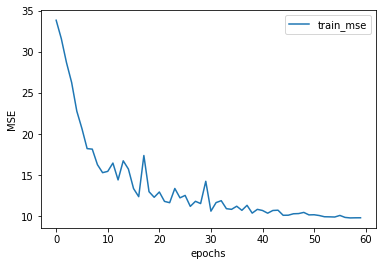

In [103]:
plt.plot(train_l, label='train_mse')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(loc = 1)

In [104]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None},
  1: {'momentum_buffer': None},
  2: {'momentum_buffer': None},
  3: {'momentum_buffer': None},
  4: {'momentum_buffer': None},
  5: {'momentum_buffer': None},
  6: {'momentum_buffer': None},
  7: {'momentum_buffer': None},
  8: {'momentum_buffer': None},
  9: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.002303489949347597,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'initial_lr': 0.05,
   'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]}

In [105]:
lr_lambda(60)*0.05

0.002303489949347597

In [106]:
torch.manual_seed(24)

tanh_model1 = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")

In [107]:
train_l2, test_l2 = fit_rec(net = tanh_model1, 
                             criterion = nn.MSELoss(), 
                             optimizer = optim.SGD(tanh_model1.parameters(),lr=0.03), 
                             train_data = train_loader,
                             test_data = test_loader,
                             epochs = 60, 
                             cla = False, 
                             eva = mse_cal)

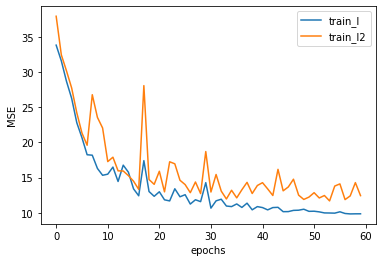

In [108]:
plt.plot(train_l, label='train_l')
plt.plot(train_l2, label='train_l2')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(loc = 1)

In [109]:
torch.manual_seed(24)

tanh_model1 = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")
train_l3, test_l3 = fit_rec(net = tanh_model1, 
                             criterion = nn.MSELoss(), 
                             optimizer = optim.SGD(tanh_model1.parameters(),lr=0.01), 
                             train_data = train_loader,
                             test_data = test_loader,
                             epochs = 60, 
                             cla = False, 
                             eva = mse_cal)

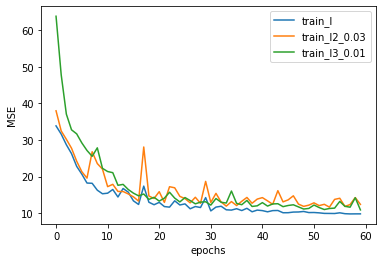

In [110]:
plt.plot(train_l, label='train_l')
plt.plot(train_l2, label='train_l2_0.03')
plt.plot(train_l3, label='train_l3_0.01')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(loc = 1)

In [111]:
torch.manual_seed(24)

tanh_model1 = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")

In [112]:
torch.manual_seed(24)

tanh_model1 = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")
train_l4, test_l4 = fit_rec(net = tanh_model1, 
                             criterion = nn.MSELoss(), 
                             optimizer = optim.SGD(tanh_model1.parameters(),lr=0.005), 
                             train_data = train_loader,
                             test_data = test_loader,
                             epochs = 60, 
                             cla = False, 
                             eva = mse_cal)

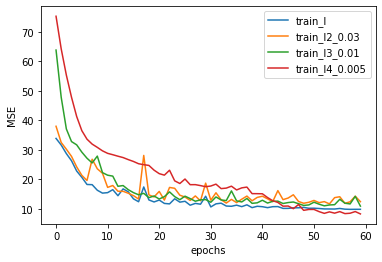

In [113]:
plt.plot(train_l, label='train_l')
plt.plot(train_l2, label='train_l2_0.03')
plt.plot(train_l3, label='train_l3_0.01')
plt.plot(train_l4, label='train_l4_0.005')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(loc = 1)

In [132]:
torch.manual_seed(24)  

# 实例化模型  
tanh_model1 = net_class2(act_fun=torch.tanh, in_features=5, BN_model='pre')

In [133]:
# 创建用于保存记录结果的空列表容器
train_mse = []
test_mse = []

# 创建可以捕捉手动输入数据的模型训练流程
while input("Do you want to continue the iteration? [y/n]") == "y":    # 询问是否继续迭代
  epochs = int(input("Number of epochs:"))                           # 下一轮迭代遍历几次数据
  lr = float(input("Update learning rate："))                        # 设置下一轮迭代的学习率
  train_l5, test_l5 = fit_rec(net = tanh_model1, 
                criterion = nn.MSELoss(), 
                optimizer = optim.SGD(tanh_model1.parameters(), lr = lr), 
                train_data = train_loader,
                test_data = test_loader,
                epochs = epochs, 
                cla = False, 
                eva = mse_cal)
  train_mse.extend(train_l5)
  test_mse.extend(test_l5)

Do you want to continue the iteration? [y/n]y
Number of epochs:30
Update learning rate：0.03
Do you want to continue the iteration? [y/n]y
Number of epochs:30
Update learning rate：0.01
Do you want to continue the iteration? [y/n]n


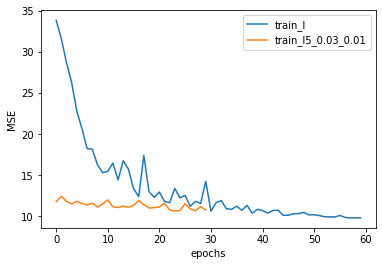

In [134]:
plt.plot(train_l, label='train_l')
plt.plot(train_l5, label='train_l5_0.03_0.01')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(loc = 1)